1) Фреймворк - Pytorch (torchvision.models.detection)

2)Запуск детектора на случайных картинках


In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv
from PIL import Image
import cv2
from pathlib import Path
from xml.etree import ElementTree

In [0]:
model = tv.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [3]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

--2020-06-14 15:12:30--  https://thumbs.dreamstime.com/z/%D1%81%D0%B2%D0%B5%D0%B6%D0%B8%D0%B5-%D1%8F%D0%B1%D0%BB%D0%BE%D0%BA%D0%B8-%D0%B0%D0%BF%D0%B5%D0%BB%D1%8C%D1%81%D0%B8%D0%BD%D1%8B-%D0%B8-%D0%B1%D0%B0%D0%BD%D0%B0%D0%BD%D1%8B-%D0%BD%D0%B0-%D0%B1%D0%B5%D0%BB%D0%B8%D0%B7%D0%BD%D0%B5-116874783.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.233.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.233.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93511 (91K) [image/jpeg]
Saving to: ‘свежие-яблоки-апельсины-и-бананы-на-белизне-116874783.jpg.1’

свежие-яблоки-апель 100%[===================>]  91.32K  --.-KB/s    in 0.009s  

2020-06-14 15:12:30 (10.1 MB/s) - ‘свежие-яблоки-апельсины-и-бананы-на-белизне-116874783.jpg.1’ saved [93511/93511]



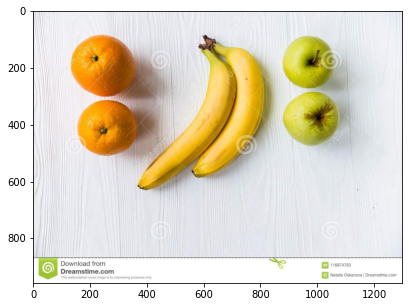

In [4]:
!wget https://thumbs.dreamstime.com/z/%D1%81%D0%B2%D0%B5%D0%B6%D0%B8%D0%B5-%D1%8F%D0%B1%D0%BB%D0%BE%D0%BA%D0%B8-%D0%B0%D0%BF%D0%B5%D0%BB%D1%8C%D1%81%D0%B8%D0%BD%D1%8B-%D0%B8-%D0%B1%D0%B0%D0%BD%D0%B0%D0%BD%D1%8B-%D0%BD%D0%B0-%D0%B1%D0%B5%D0%BB%D0%B8%D0%B7%D0%BD%D0%B5-116874783.jpg
pilimg = Image.open("/content/свежие-яблоки-апельсины-и-бананы-на-белизне-116874783.jpg").convert("RGB")
plt.figure(figsize=(10,5))
plt.imshow(pilimg);

In [5]:
model.eval()
img = tv.transforms.ToTensor()(pilimg).unsqueeze(0)
predict = model(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [0]:
def plot_preds(pilimg, predict):
    numimg = np.array(pilimg)
    boxes = predict[0]['boxes'][predict[0]['scores']>0.9].detach().numpy()
    labels = predict[0]['labels'][predict[0]['scores']>0.9].detach().numpy()
    # Переведем метки в названия
    COCO = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
    # Отрисовка
    counter=0
    for i in boxes:
        final = cv2.rectangle(numimg, (i[0],i[1]), (i[2],i[3]), color=(128, 0, 128), thickness=3)
        cv2.putText(numimg, str(COCO[labels[counter]]), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (0,0,0), 2)
        counter+=1
    plt.figure(figsize=(10,5))
    return plt.imshow(final)

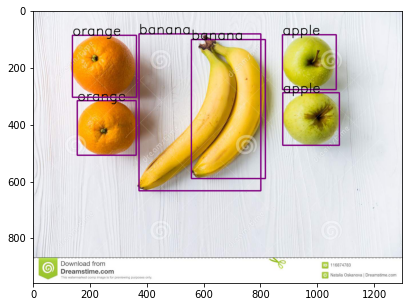

In [7]:
plot_preds(pilimg, predict)

В данном проекте попытаюсь выполнить оба сценария.
Датасет: https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection
Детекция фруктов

In [8]:
#Загрузим датасет
import gdown
gdown.download('https://drive.google.com/uc?id=1itp1MtwVuF5xFnJkbErNQuDwKjEdmPvM', '34662_46346_bundle_archive.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1itp1MtwVuF5xFnJkbErNQuDwKjEdmPvM
To: /content/34662_46346_bundle_archive.zip
29.7MB [00:00, 84.1MB/s]


'34662_46346_bundle_archive.zip'

In [9]:
#Разархивируем датасет с каггла
!unzip 34662_46346_bundle_archive.zip > /dev/null

replace test_zip/test/apple_77.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
#Кодируем классы
label_code = ['apple', 'orange', 'banana']

In [11]:
def preparing_dataset(path, mode):
    path = Path(path)
    if mode == "train":
        _path = path /'train_zip'/'train'
        img_lst = list(sorted(_path.glob("*.jpg")))
        xml_lst = list(sorted(_path.glob("*.xml")))
    elif mode == "test":
        _path = path/'test_zip'/'test'
        img_lst = list(sorted(_path.glob("*.jpg")))
        xml_lst = list(sorted(_path.glob("*.xml")))
    else:
        raise ValueError('Incorrect mode')
    #список тензоров картинок
    IMG_TENS = []
    for i in img_lst:
        pil = Image.open(i).convert("RGB")
        img = tv.transforms.ToTensor()(pil).unsqueeze(0)
        IMG_TENS.append(img)
    #словарь таргетов
    label_code = ['apple', 'orange', 'banana']
    TARGET = []
    for _ in xml_lst:
        tree = ElementTree.parse(_)
        root = tree.getroot()
        name = []
        coord = []
        for element in root.iter('object'):
            tempcoord = []
            for child in element:
                if child.tag == 'name':
                    name += [label_code.index(child.text)]
                elif child.tag == 'bndbox':
                    for i in child:
                        tempcoord +=[int(i.text)]
                    coord +=[tempcoord]
        coord = torch.FloatTensor(coord)
        name = torch.IntTensor(name)
        label = {'boxes':coord , 'labels': name}
        TARGET.append(label)
    return IMG_TENS, TARGET
train_img_tens, train_target = preparing_dataset('/content', mode='train')
val_img_tens, val_target = preparing_dataset('/content', mode='test')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [0]:
class FrutDataset (torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x 
        self.y = y
        self.len_ = len(self.x)
    def __len__(self):
        return self.len_
    def __getitem__(self, index):
        x = self.x[index]
        y = self.y[index]
        return x, y

In [0]:
#Создаем обучающий и валидационный сеты
train_set = FrutDataset(x=train_img_tens, y=train_target)
val_set = FrutDataset(x=val_img_tens, y=val_target)

In [0]:
#Загрузчики
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)

In [0]:
def plot_rand_img(list_of_img_tens, list_of_dicts):
    idx = 0 #np.random.randint(0,241)
    x = list_of_img_tens[idx]
    x = torch.squeeze(x,dim=0).permute(1,2,0).numpy()
    y = list_of_dicts[idx]
    boxes = y['boxes'].numpy()
    classes = y['labels'].numpy()
    counter=0
    print (x.shape)
    for i in boxes:
        print(i[0], i[1], i[2], i[3])
        print(type(i[0]))
        final = cv2.rectangle(x, (i[0],i[1]), (i[2],i[3]), color=(0, 0, 0), thickness=3)
        plt.imshow(final)
        #cv2.putText(x, str(classes[counter]), (i[0],i[1]), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (0,0,0), 2)
        #counter+=1
    plt.figure(figsize=(10,5))
    return plt.imshow(final)

(349, 349, 3)
8.0 15.0 331.0 349.0
<class 'numpy.float32'>


TypeError: ignored

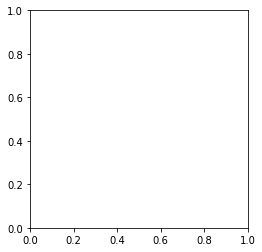

In [20]:
plot_rand_img(train_img_tens, train_target)

In [0]:
#Цикл обучения
def train_model